In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

# 读取数据
#data = pd.read_csv(r"E:\大学\综合项目实践\013minmax.csv")
data=pd.read_csv(r"E:\大学\综合项目实践\归一&特征选择&bp\Z-Score标准化.csv")

# 将日期列转换为日期类型
data['Date'] = pd.to_datetime(data['Date'])

data.head()

,Date,Discharge,Dayl,Prcp,Srad,Swe,Tmax,Tmin,Vp,Prcp_lag_1,...,Tmax_lag_6,Srad_lag_6,Discharge_lag_6,Prcp_lag_7,Tmax_lag_7,Srad_lag_7,Discharge_lag_7,Year,Month,Day
0,2000-01-08,49.0,-1.375809,-0.269642,-1.184460,NaN,-0.992849,-0.729902,-0.836319,-0.507515,...,-0.501052,-0.781345,-0.532577,-0.508870,-0.997933,-0.857839,-0.531815,-1.421237,-1.61127,-0.885057
1,2000-01-09,46.0,-1.375809,-0.507515,-1.134343,NaN,-1.058464,-0.751663,-0.847891,-0.269642,...,-0.075040,-1.073961,-0.487535,-0.508870,-0.501400,-0.781438,-0.531815,-1.421237,-1.61127,-0.771299
2,2000-01-10,83.0,-1.331552,-0.507515,-1.269985,NaN,-0.760459,-0.350065,-0.583796,-0.507515,...,-0.078697,-1.324472,-0.190256,-0.162309,-0.075277,-1.074070,-0.486761,-1.421237,-1.61127,-0.657542
3,2000-01-11,120.0,-1.331552,1.941103,-1.862290,NaN,-0.700312,-0.016719,-0.321015,-0.507515,...,-0.061327,-0.978066,-0.064138,0.643647,-0.078935,-1.324593,-0.189405,-1.421237,-1.61127,-0.543785
4,2000-01-12,79.0,-1.331552,-0.347589,-1.359452,NaN,-0.762282,-0.338195,-0.575617,1.941103,...,-1.386900,-0.832023,-0.388442,1.362291,-0.061561,-0.978170,-0.063254,-1.421237,-1.61127,-0.430027


In [2]:
# 设定特征和目标变量
features =['Prcp','Discharge_lag_1','Discharge_lag_2','Discharge_lag_3','Discharge_lag_4','Discharge_lag_5']
X = data[features]
y = data['Discharge']
# 分割训练集和测试集（前80%作为训练集，后20%作为测试集）
train_size = int(0.8 * len(data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 特征标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [3]:
# 基学习器
base_learners = [
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(n_estimators=200)),
    ('svr', SVR(C=1.0, gamma='scale')),
    ('knn', KNeighborsRegressor(n_neighbors=5)),
    ('xgb', XGBRegressor(n_estimators=100))
]

# 训练每个基学习器
for name, model in base_learners:
    model.fit(X_train_scaled, y_train)

In [4]:
# 预测并进行简单平均
predictions = np.zeros(X_test_scaled.shape[0])
for name, model in base_learners:
    predictions += model.predict(X_test_scaled)
predictions /= len(base_learners)

# 评估
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² Score: {r2}')


Mean Squared Error (MSE): 2718.8809203669757
Mean Absolute Error (MAE): 18.62599901865117
R² Score: 0.6759968340646626


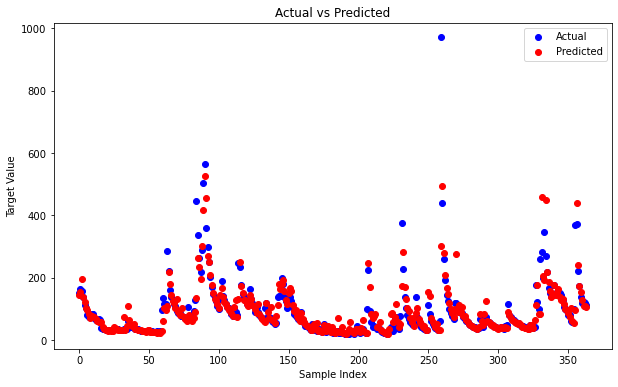

In [5]:
import matplotlib.pyplot as plt
# 假设 y_test 是测试集的实际目标值，y_pred 是模型预测的目标值
# 这里假设 y_test 和 y_pred 都是一维数组，包含了每个样本的目标值

# 创建一个新的图形
plt.figure(figsize=(10, 6))

# 绘制预测结果和实际结果的对比图
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Actual')  # 实际结果用蓝色散点表示
plt.scatter(np.arange(len(predictions)), predictions, color='red', label='Predicted')  # 预测结果用红色散点表示

# 添加图例和标签
plt.legend()
plt.title('Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')

# 显示图形
plt.show()

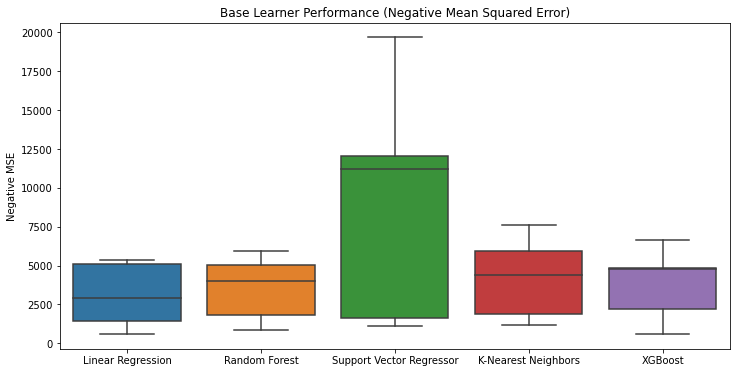

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# 基学习器
base_learners = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(n_estimators=200)),
    ('Support Vector Regressor', SVR(C=1.0, gamma='scale')),
    ('K-Nearest Neighbors', KNeighborsRegressor(n_neighbors=5)),
    ('XGBoost', XGBRegressor(n_estimators=100))
]

# 存储评估结果
results = {}

# 评估每个基学习器
for name, model in base_learners:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    results[name] = scores

# 转换为DataFrame便于可视化
results_df = pd.DataFrame(results).abs()

# 可视化每个基学习器的MSE
plt.figure(figsize=(12, 6))
sns.boxplot(data=results_df)
plt.title('Base Learner Performance (Negative Mean Squared Error)')
plt.ylabel('Negative MSE')
plt.show()